In [1]:
from pyhdf.SD import SD,SDC
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import os
PROJECT_DIR = "/Users/zbutler/research/fire_prediction/"
os.chdir(PROJECT_DIR)
from util.tile2latlon import tile2latlon, latlon2tile
os.chdir("data/burnt/modis")
%matplotlib inline

In [2]:
# First, let's just look at the dates of each of the files in each of the folders
dr2dates = dict()
dr2fracs = dict()
for dr in os.listdir('.'):
    dates = []
    fracs = []
    for filename in os.listdir('./%s' % dr):
        map_year = int(filename.split('.')[0][1:5])
        map_day = int(filename.split('.')[0][5:])
        frac = map_year + (float(map_day) / 365)
        dates.append((map_year, map_day))
        fracs.append(frac)
    dr2dates[dr] = dates
    dr2fracs[dr] = fracs

cell 0: h10v03 (197 records, eq = 1)
cell 1: h10v02 (197 records, eq = 1)
cell 2: h11v02 (197 records, eq = 1)
cell 3: h11v03 (197 records, eq = 1)
cell 4: h09v03 (197 records, eq = 1)
cell 5: h09v02 (197 records, eq = 1)


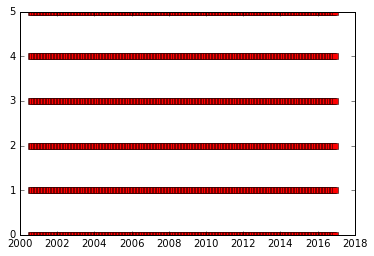

In [3]:
tester = np.array(dr2fracs['h10v02'])
for i,(dr, fracs) in enumerate(dr2fracs.iteritems()):
    plt.plot(fracs, np.zeros(len(fracs)) + i, 'rs')
    if (np.array(fracs) == tester).all():
        eq = 1
    else:
        eq = 0
    print "cell %d: %s (%d records, eq = %d)" %(i, dr, len(fracs), eq)
plt.show()


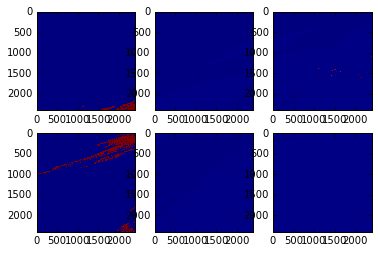

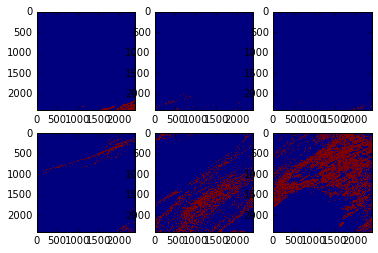

In [4]:
# Now, let's plot all the tiles next to each other in a subplot
time_str = 'A2013213'  # Collect data from 2013 
hstart = 9
hend = 11
vstart = 2
vend = 3
f, axarr = plt.subplots(vend-vstart+1, hend-hstart+1)
for h in xrange(hstart, hend+1):
    for v in xrange(vstart, vend+1):
        filename = glob("./h%.2dv%.2d/%s*" % (h, v, time_str))[0]
        hdf = SD(filename, SDC.READ)
        axarr[v-vstart, h-hstart].imshow(hdf.select("Burn Date")[:])
plt.show()

time_str_2 = 'A2013335'  # Collect data from 2013 
f, axarr = plt.subplots(vend-vstart+1, hend-hstart+1)
for h in xrange(hstart, hend+1):
    for v in xrange(vstart, vend+1):
        filename = glob("./h%.2dv%.2d/%s*" % (h, v, time_str_2))[0]
        hdf = SD(filename, SDC.READ)
        axarr[v-vstart, h-hstart].imshow(hdf.select("Burn Date")[:])
plt.show()

In [6]:
# use tile2latlon to see the borders we're plotting rn--is it all of Alaska?
mat = hdf.select("Burn Date")[:]
n_pix = mat.shape[0]
min_lat_1, min_lon_1 = tile2latlon(9,2,0,0,n_pix)
print (min_lat_1, min_lon_1-360)
min_lat_2, min_lon_2 = tile2latlon(9,2,n_pix-1,n_pix-1,n_pix)
print (min_lat_2, min_lon_2-360)
min_lat_1, min_lon_1 = tile2latlon(9,2,0,n_pix-1,n_pix)
print (min_lat_1, min_lon_1-360)
min_lat_2, min_lon_2 = tile2latlon(9,2,n_pix-1,0,n_pix)
print (min_lat_2, min_lon_2-360)
min_lat_1, min_lon_1 = tile2latlon(9,3,0,0,n_pix)
print (min_lat_1, min_lon_1-360)
min_lat_2, min_lon_2 = tile2latlon(9,3,n_pix-1,n_pix-1,n_pix)
print (min_lat_2, min_lon_2-360)
min_lat_1, min_lon_1 = tile2latlon(9,3,0,n_pix-1,n_pix)
print (min_lat_1, min_lon_1-360)
min_lat_2, min_lon_2 = tile2latlon(9,3,n_pix-1,0,n_pix)
print (min_lat_2, min_lon_2-360)
min_lat, min_lon = tile2latlon(9, 3, 0, n_pix-1, n_pix)
max_lat, max_lon = tile2latlon(11, 2, n_pix-1, 0, n_pix)
print "Our bb1: " + str((min_lat, max_lat, min_lon-360, max_lon-360))

ak_bb = [55, 71, -165, -138]

(69.99788394706887, -96.878334529868482)
(60.00205528615526, -159.99183326023834)
(60.00205528615526, -179.98473277934033)
(69.99788394706887, -67.655451936278268)
(59.997888621436246, -180.00740573028443)
(50.00205996052264, -204.42426503439182)
(50.00205996052264, -219.97568019647829)
(59.997888621436246, -160.01702431999081)
Our bb1: (50.00205996052264, 69.99788394706887, -219.97568019647829, -9.1853241958726244)


In [7]:
# ok this is annoying. let's try going the opposite way--figure out which tile each point of
# the ak_bb is in
tr_h, tr_v = latlon2tile(ak_bb[1], ak_bb[3])
br_h, br_v = latlon2tile(ak_bb[0], ak_bb[3])
tl_h, tl_v = latlon2tile(ak_bb[1], ak_bb[2])
bl_h, bl_v = latlon2tile(ak_bb[0], ak_bb[2])

print "top right: " + str((tr_h, tr_v))
print "bottom right: " + str((br_h, br_v))
print "top left: " + str((tl_h, tl_v))
print "bottom left: " + str((bl_h, bl_v))

top right: (14, 1)
bottom right: (11, 3)
top left: (13, 1)
bottom left: (9, 3)


In [8]:
# use dumb haxx to see what we have rn
ak_lats = []
ak_lons = []
for h in xrange(9,12):
    for v in xrange(2,4):
        for i in xrange(n_pix):
            for j in xrange(n_pix):
                lat,lon = tile2latlon(h, v, i, j, n_pix)
                if ak_bb[0] < lat < ak_bb[1] and ak_bb[2] < lon-360 < ak_bb[3]:
                    ak_lats.append(lat)
                    ak_lons.append(lon)
        print "finished h %d v %d" %(h,v)

finished h 9 v 2
finished h 9 v 3
finished h 10 v 2
finished h 10 v 3
finished h 11 v 2
finished h 11 v 3


6860358 pts
min lat: 55.002058, max lat: 66.081219
min lon: -164.999998, max lon: -138.000000


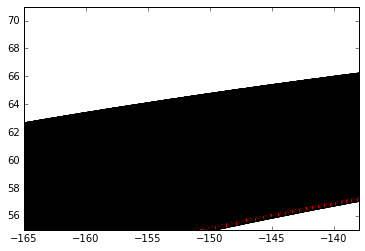

In [15]:
n_pts = len(ak_lats)
ak_lats = np.array(ak_lats, dtype='float')
ak_lons = np.array(ak_lons, dtype='float') - 360
print "%d pts" %(n_pts)
print "min lat: %f, max lat: %f" %(min(ak_lats), max(ak_lats))
print "min lon: %f, max lon: %f" %(min(ak_lons), max(ak_lons))
plt.scatter(ak_lons[0:n_pts:4], ak_lats[0:n_pts:4], c='k')
plt.xlim(ak_bb[2], ak_bb[3])
plt.ylim(ak_bb[0], ak_bb[1])
plt.show()

In [30]:
print np.min(hdf.select("First Day")[:])
print np.max(hdf.select("First Day")[:])
print np.min(hdf.select("Last Day")[:])
print np.max(hdf.select("Last Day")[:])

0
365
0
365


In [41]:
filename_2 = glob("data/burnt/modis/h10v02/A2013182.*")[0]
hdf_2 = SD(filename_2, SDC.READ)
print np.min(hdf_2.select("First Day")[:])
print np.max(hdf_2.select("First Day")[:])
print np.min(hdf_2.select("Last Day")[:])
print np.max(hdf_2.select("Last Day")[:])
print np.unique(hdf_2.select("Burn Date")[:])

0
212
0
263
[ -1   0 182 183 184 185 186 187 188 189 190 191 192 193 194 195 200 205
 208 210 211 212]


In [35]:
#os.chdir("../../..")
from util.daymonth import day2monthday
print day2monthday(213)

(8, 2)


In [43]:
# How much overlap do we have between consecutive months?
fn_h10v02_jul = glob("data/burnt/modis/h10v02/A2013182.*")[0]
hdf_jul = SD(fn_h10v02_jul, SDC.READ)
fn_h10v02_aug = glob("data/burnt/modis/h10v02/A2013213.*")[0]
hdf_aug = SD(fn_h10v02_aug, SDC.READ)

print "%d burnt pixels in july" %np.sum(hdf_jul.select("Burn Date")[:] > 0)
print "%d burnt pixels in august" %np.sum(hdf_aug.select("Burn Date")[:] > 0)
combo = np.logical_and(hdf_jul.select("Burn Date")[:] > 0, hdf_aug.select("Burn Date")[:] > 0)
print "%d burned in both" %np.sum(combo)

353 burnt pixels in july
170 burnt pixels in august
0 burned in both


In [57]:
start_of_month_arr = ['001','032','060','091','121','152','182','213','244','274','305','335']
overall_arr = np.zeros((n_pix, n_pix))
for month,daystr in enumerate(start_of_month_arr):
    fn = glob("data/burnt/modis/h10v02/A2010%s.*" % daystr)[0]
    hdf_data = SD(fn, SDC.READ).select("Burn Date")[:]
    print "%d pixels burnt in month %d" %(np.sum(hdf_data > 0), month)
    if month > 0:
        last_month_overlap = np.logical_and(hdf_data > 0, last_hdf > 0)
        print "%d pixels overlap with last month in month %d" %(np.sum(last_month_overlap), month)
    overall_overlap = np.logical_and(hdf_data > 0, overall_arr > 0)
    print "%d overlap with past in month %d" %(np.sum(overall_overlap), month)
    overall_arr = np.logical_or(overall_arr, hdf_data > 0)
    last_hdf = hdf_data

0 pixels burnt in month 0
0 overlap with past in month 0
0 pixels burnt in month 1
0 pixels overlap with last month in month 1
0 overlap with past in month 1
0 pixels burnt in month 2
0 pixels overlap with last month in month 2
0 overlap with past in month 2
0 pixels burnt in month 3
0 pixels overlap with last month in month 3
0 overlap with past in month 3
581 pixels burnt in month 4
0 pixels overlap with last month in month 4
0 overlap with past in month 4
1178 pixels burnt in month 5
0 pixels overlap with last month in month 5
0 overlap with past in month 5
0 pixels burnt in month 6
0 pixels overlap with last month in month 6
0 overlap with past in month 6
0 pixels burnt in month 7
0 pixels overlap with last month in month 7
0 overlap with past in month 7
0 pixels burnt in month 8
0 pixels overlap with last month in month 8
0 overlap with past in month 8
0 pixels burnt in month 9
0 pixels overlap with last month in month 9
0 overlap with past in month 9
0 pixels burnt in month 10
0 

In [67]:
bin(hdf_jul.select("QA")[:][-10,-10])

'0b10011'